In [8]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)

### 카이제곱-검정
- 카이제곱 분포에 기초한 통계적 방법
- 관찰된 빈도가 기대빈도와 의미있게 다른지의 여부를 검증하기 위해 사용되는 검증방법
- 자료가 빈도로 주어졌을 때, 특히 명목척도 자료의 분석에 이용
- 질적자료와 질적자료간에 서로 통계적으로 관계가 있는지 판단하는 검정
- 단일 표본의 모집단이 정규분포를 따르며 분산을 미리 알고 있는 경우에 적용된다.

제품의 판매량 비율은 다음과 같습니다. A: 56%, B: 12%, C: 32%

그런데 특정 지역에 제품 A, B, C의 보유대수를 조사하니 각각 324대, 78대, 261대였습니다. 

이 자료로 다음과 같이 관찰빈도와 기대빈도를 만들 수 있다.
- 귀무가설 H0: 관찰빈도는 기대빈도와 같다
- 대립가설 H1: 관찰빈도는 기대빈도와 다르다


In [3]:
xo, xe = [324, 78, 261], [371, 80, 212]
xc = pd.DataFrame([xo, xe], columns=['A', 'B', 'C'], index=['관찰', '기대'])
xc

,A,B,C
관찰,324,78,261
기대,371,80,212


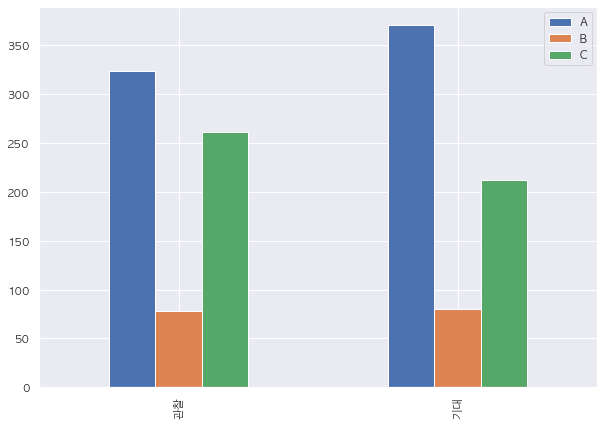

In [9]:
xc.plot.bar()
plt.show()

In [11]:
result = stats.chisquare(xo, f_exp=xe)
result.pvalue

0.00017254977751013492

p-value값이 0.05보다 작으므로 대립가설 채택

### F-검정(등분산 여부 검정)
- 등분산 검정은 두 집단 혹은 세 집단 이상 사이에 산포도 차이가 있는지를 통계적인 방법으로 검정하는 것으로, 두 집단 이상의 분산 차이를 검정할 때 사용할 수 있다.
즉, 각 집단이 갖는 분산이 같은 것을 귀무 가설로, 차이가 있는 것을 대립 가설로 하여 검정하는 방법이다.

어떤 지역에서 동일한 제품을 판매하고 직원 수도 동일한 두 가게를 가정하였다 

두 가게가 포함된 상권을 조사하는 과정에서 두 가게의 일별 매출의 변동을 통해 상권을 이해하고자 한다. 
- 귀무가설 H0: 두 가게의 매출 값의 분산은 같다.
- 대립가설 H1: 두 가게의 매출 값의 분산은 다르다.

F 검정 결과 귀무가설이 기각된다면 우리는 객관적으로 동일한 조건을 갖는 두 가게의 매출 값의 분산이 통계적으로 다르다고 할 수 있다.

In [15]:
# 남녀의 영어 성적에 대한 분산 분석
boy = np.array([46, 47, 58, 47, 27, 58, 56, 26, 47, 25])
girl = np.array([78, 57, 31, 28, 67, 77, 36, 57, 36, 57])

# 귀무가설: 남녀 성적의 분산은 같다
# 대립가설: 남녀 성적의 분산은 다르다

pvalue = stats.f_oneway(boy, girl).pvalue
if pvalue < 0.05:
    print('귀무가설 기각, 대립가설 채택 -> 남녀 성적의 분산은 다르다')
else:
    print('귀무가설 채택 -> 남녀 성적의 분산은 같다')

귀무가설 채택 -> 남녀 성적의 분산은 같다
